In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import scipy.stats as stats 

from IPython.display import set_matplotlib_formats

mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus =True)
set_matplotlib_formats('retina')
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000
import warnings 
warnings.filterwarnings('ignore')


# 학습/검증 데이터 분할 / 매개변수 튜닝 / 교차검증 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# 평가 
from sklearn.metrics import classification_report
from IPython.display import Image
import pandas as pd
import numpy as np
import pydotplus

import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin'

C:\Users\user\AppData\Local\Temp/ipykernel_5472/2658850191.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


## 럭키백의 확률

In [66]:
fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [67]:
print(fish['Species'].unique())

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [68]:
fish_input=fish.iloc[:,1:]

In [69]:
fish_input = fish_input.to_numpy()

In [70]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [71]:
fish_target = fish['Species'].to_numpy()

In [72]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [73]:
## standard scaling
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [74]:
print(train_input.shape,train_target.shape)

(119, 5) (119,)


### KNN-classifier

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=3)

In [83]:
knc.fit(train_scaled,train_target)

KNeighborsClassifier(n_neighbors=3)

In [84]:
print(knc.score(train_scaled, train_target))
print(knc.score(test_scaled, test_target))

0.8907563025210085
0.85


In [85]:
knc.score(train_scaled,train_target)

0.8907563025210085

### 다중 분류(Multi-class Classifier)

- 2개 이상의 class가 있는 타깃 데이터를 분류 하는 것을 다중 분류라고 한다.
- 이진 분류에서는 sigmoid 함수를 사용해 표준점수(z-score)를 0~1 사이의 값으로 변환
- 다중 분류에서는 softmax 함수를 사용해 표준점수(z-score)를 확률로 변환

In [86]:
print(knc.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [87]:
print(knc.predict(train_scaled[:5]))

['Bream' 'Pike' 'Smelt' 'Perch' 'Parkki']


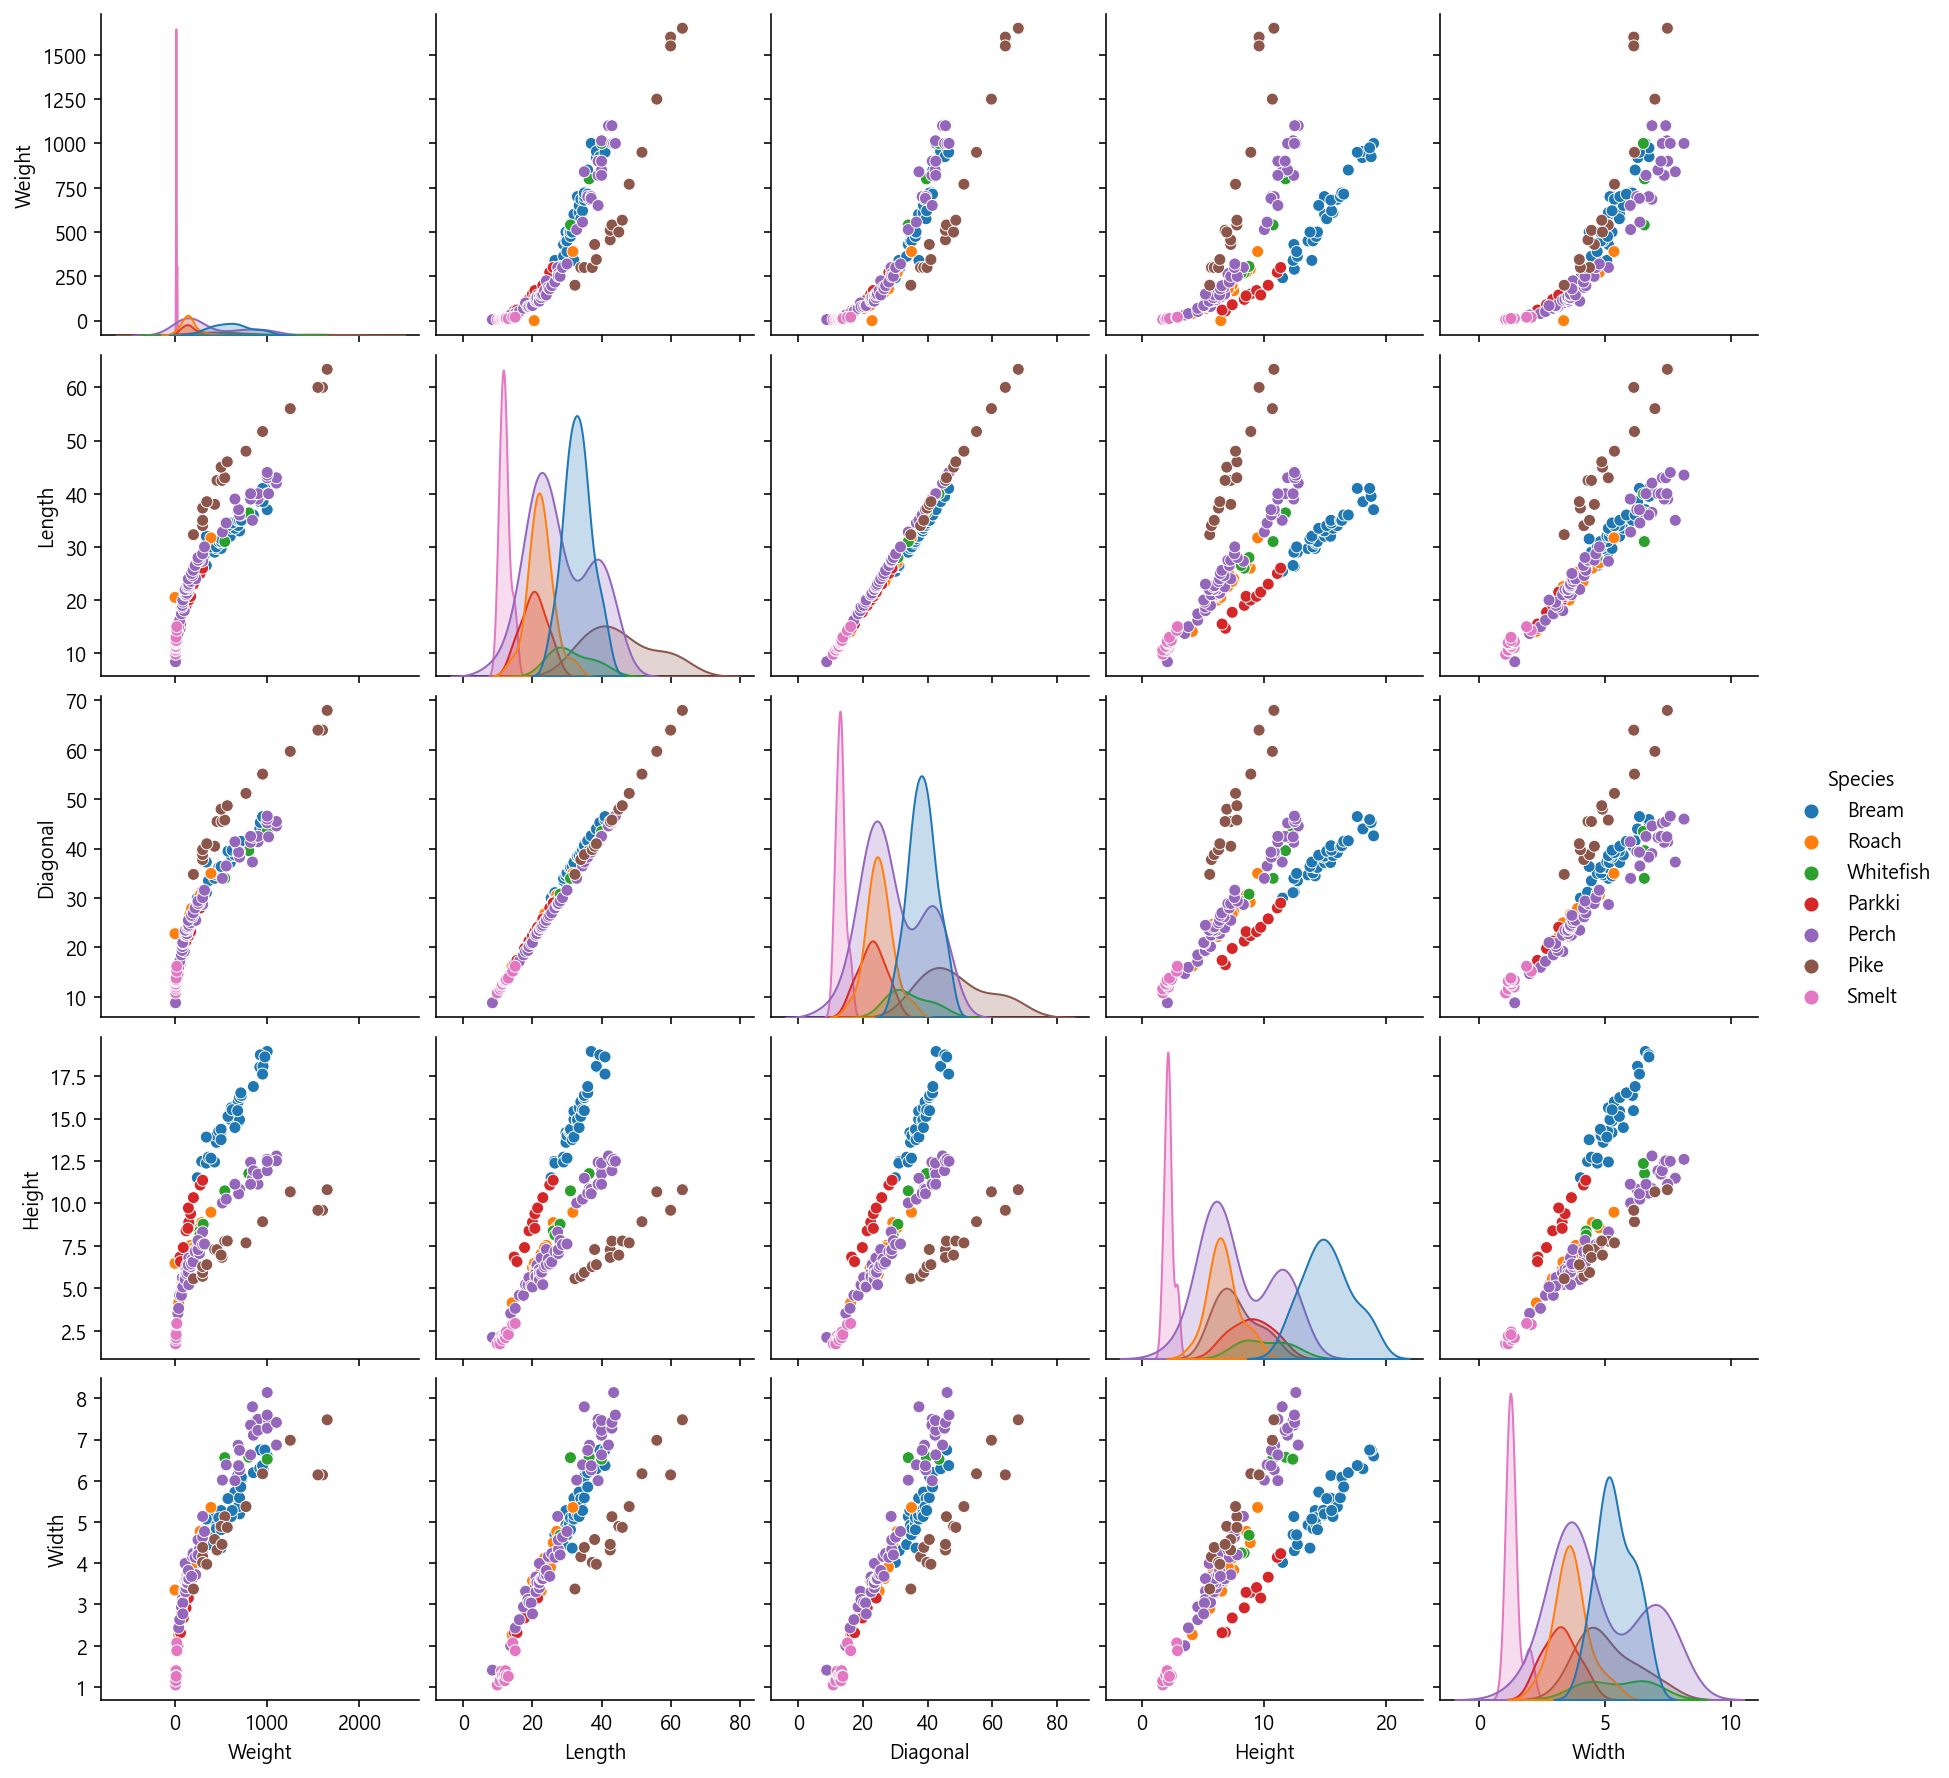

In [88]:
sns.pairplot(fish,hue='Species')

__predict.proba()__

- 분류의 class별 확률값을 반환해주는 함수

In [89]:
proba = knc.predict_proba(test_scaled[:5])
print(np.round(proba,decimals=5))

[[0.      0.      1.      0.      0.      0.      0.     ]
 [0.      0.      0.      0.      0.      1.      0.     ]
 [0.      0.      0.      1.      0.      0.      0.     ]
 [0.      0.      0.66667 0.      0.33333 0.      0.     ]
 [0.      0.      0.66667 0.      0.33333 0.      0.     ]]


In [90]:
distances,indexes=knc.kneighbors(train_scaled[3:4])
print(train_target[indexes])

[['Perch' 'Roach' 'Perch']]


## 로지스틱 회귀(logistic regression)

- 이름에는 회귀가 들어가 있지만 회귀 모델이 아닌 분류 모델
- 선형 회귀와는 다르게 직선이 아닌 's'자 모양 곡선으로 계산하는 시그모이드 함수(sigmoid function)을 사용해서 분류를 하는 모델
- 로지스틱 회귀는 정확하게 0또는 1을 예측하는 대신 확률(0~1 사이의 값)을 생성해서 0과 1을 분류하는 예측 모델
- y = sigmoid(wx+b) -- > 결과값을 0과 1사이의 값으로 조정하여 반환
- z = a x (target1) + b x (target2) + c x (target3) + d x (target4) + e

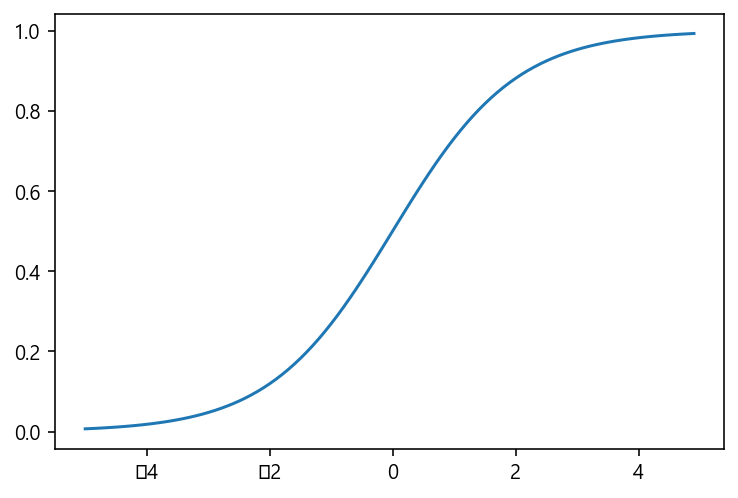

In [91]:
z = np.arange(-5,5,0.1)
phi = 1/(1+np.exp(-z))

plt.plot(z,phi)
plt.show()

### 로지스틱 회귀로 이진 분류 수행

In [92]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [93]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [94]:
from sklearn.linear_model import LogisticRegression

In [96]:
lr = LogisticRegression()
lr.fit(train_bream_smelt,target_bream_smelt)

LogisticRegression()

In [97]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [101]:
print(lr.classes_)
print(lr.predict_proba(train_bream_smelt[:5]))

['Bream' 'Smelt']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [102]:
print(lr.coef_,lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


#### 생선 이진 분류 선형 회귀 방정식

__z = -0.404 X (weight) - 0.576 X (length) - 0.663 X (diagonal) - 1.013 X (height) -0.732 X (width) -2.161__

In [103]:
# decision_fuction() --> z-score 출력
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [104]:
# expit() --> 시그모이드 함수 계산
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


### 로지스틱 회귀로 다중 분류 수행하기

In [105]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=20,max_iter=1000)
lr.fit(train_scaled,train_target)

LogisticRegression(C=20, max_iter=1000)

In [106]:
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.9327731092436975
0.925


In [109]:
print(lr.predict(train_scaled[:10]))

['Bream' 'Pike' 'Smelt' 'Perch' 'Parkki' 'Roach' 'Perch' 'Bream' 'Perch'
 'Perch']


In [110]:
proba=lr.predict_proba(train_scaled[:10])
print(np.round(proba,decimals=3))

[[0.998 0.001 0.    0.    0.    0.    0.002]
 [0.    0.    0.001 0.999 0.    0.    0.   ]
 [0.    0.002 0.051 0.    0.006 0.941 0.   ]
 [0.    0.001 0.86  0.001 0.135 0.    0.004]
 [0.009 0.783 0.007 0.    0.187 0.    0.014]
 [0.    0.052 0.356 0.001 0.548 0.039 0.004]
 [0.    0.005 0.751 0.001 0.236 0.002 0.005]
 [0.998 0.001 0.    0.    0.    0.    0.   ]
 [0.    0.027 0.612 0.001 0.346 0.002 0.012]
 [0.    0.018 0.71  0.003 0.203 0.064 0.002]]


In [111]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [114]:
print(lr.coef_.shape,lr.intercept_.shape)

(7, 5) (7,)


In [116]:
decision = lr.decision_function(test_scaled[:10])
print(np.round(decision,decimals=1))

[[ -6.5   1.    5.2  -2.7   3.3   0.3  -0.6]
 [-10.9   1.9   4.8  -2.4   3.    7.8  -4.3]
 [ -4.3  -6.2   3.2   6.5   2.4   2.4  -3.9]
 [ -0.7   0.5   2.6  -1.2   3.3  -5.8   1.3]
 [ -6.4  -2.    5.8  -0.1   3.5  -0.1  -0.7]
 [ 16.7   8.3  -3.3  -4.9   0.9 -26.5   8.8]
 [-12.3   1.9   5.8  -2.9   3.2   8.7  -4.3]
 [ -2.6  -0.8   2.9  -0.2   3.6  -2.9   0. ]
 [ -3.8  -1.1   5.   -0.9   3.5  -3.4   0.7]
 [  1.7 -14.5  10.5  14.3  -0.9 -12.2   1.1]]


In [119]:
from scipy.special import softmax
proba = softmax(decision,axis=1)
print(np.round(proba,decimals=2))

[[0.   0.01 0.84 0.   0.14 0.01 0.  ]
 [0.   0.   0.04 0.   0.01 0.95 0.  ]
 [0.   0.   0.03 0.93 0.02 0.02 0.  ]
 [0.01 0.03 0.31 0.01 0.57 0.   0.08]
 [0.   0.   0.9  0.   0.09 0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.05 0.   0.   0.94 0.  ]
 [0.   0.01 0.32 0.01 0.64 0.   0.02]
 [0.   0.   0.8  0.   0.18 0.   0.01]
 [0.   0.   0.02 0.98 0.   0.   0.  ]]


## practice

In [42]:
from sklearn.datasets import load_boston
boston = pd.DataFrame(load_boston().data)
boston.columns = load_boston().feature_names

In [43]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.5380,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.4690,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.4690,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.4580,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.4580,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.4580,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.5240,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.5240,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.5240,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.5240,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [44]:
boston['Price'] = load_boston().target

In [45]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:xlabel='RM', ylabel='Price'>

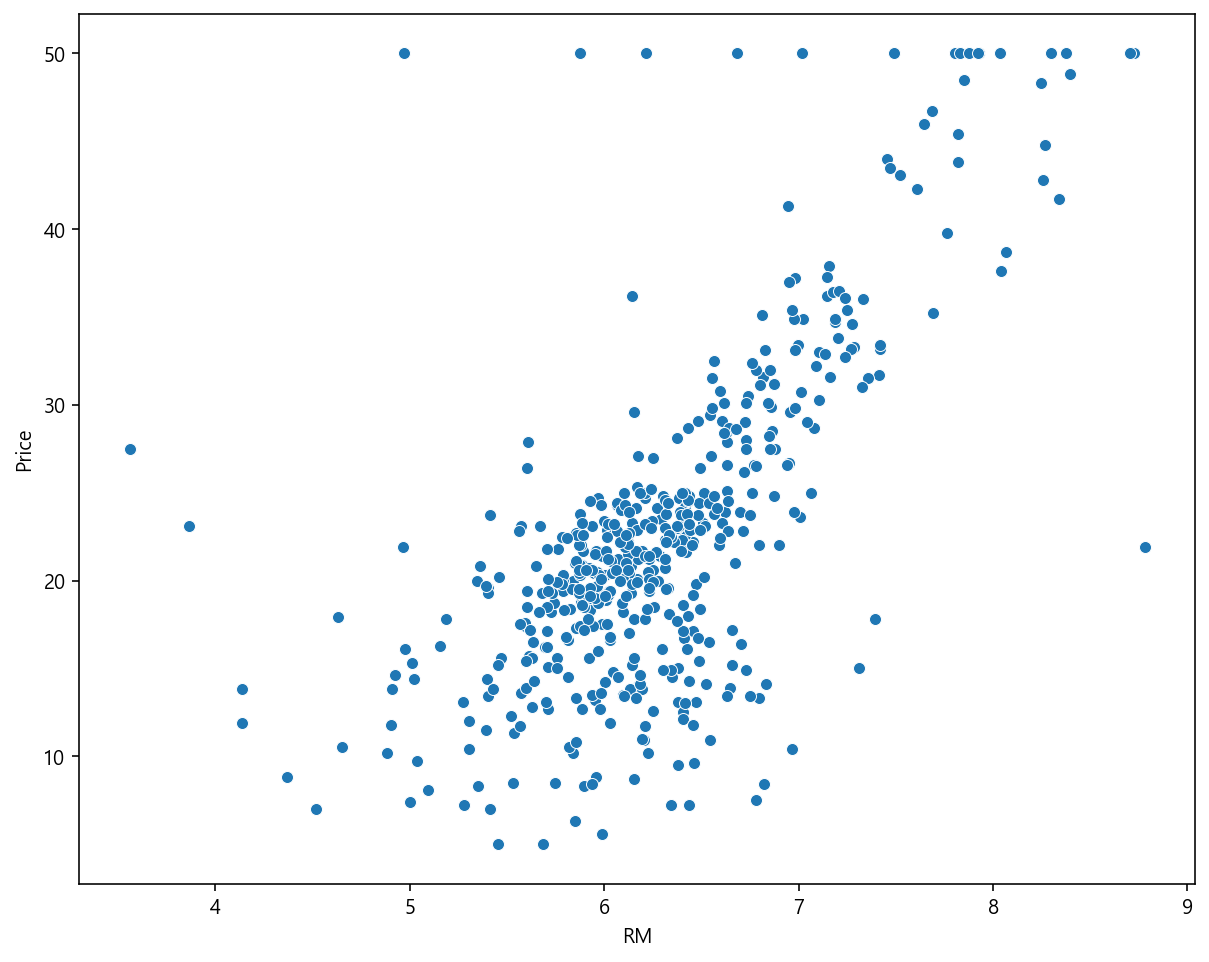

In [46]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=boston,x='RM',y='Price')

In [47]:
boston_zn_no_zero=boston[boston['ZN']!=0]

In [48]:
boston_zn_no_zero['ZN'].median()

33.0

In [49]:
boston['ZN']=boston['ZN'].apply(lambda x: boston_zn_no_zero['ZN'].median() if x==0 else x)

<AxesSubplot:>

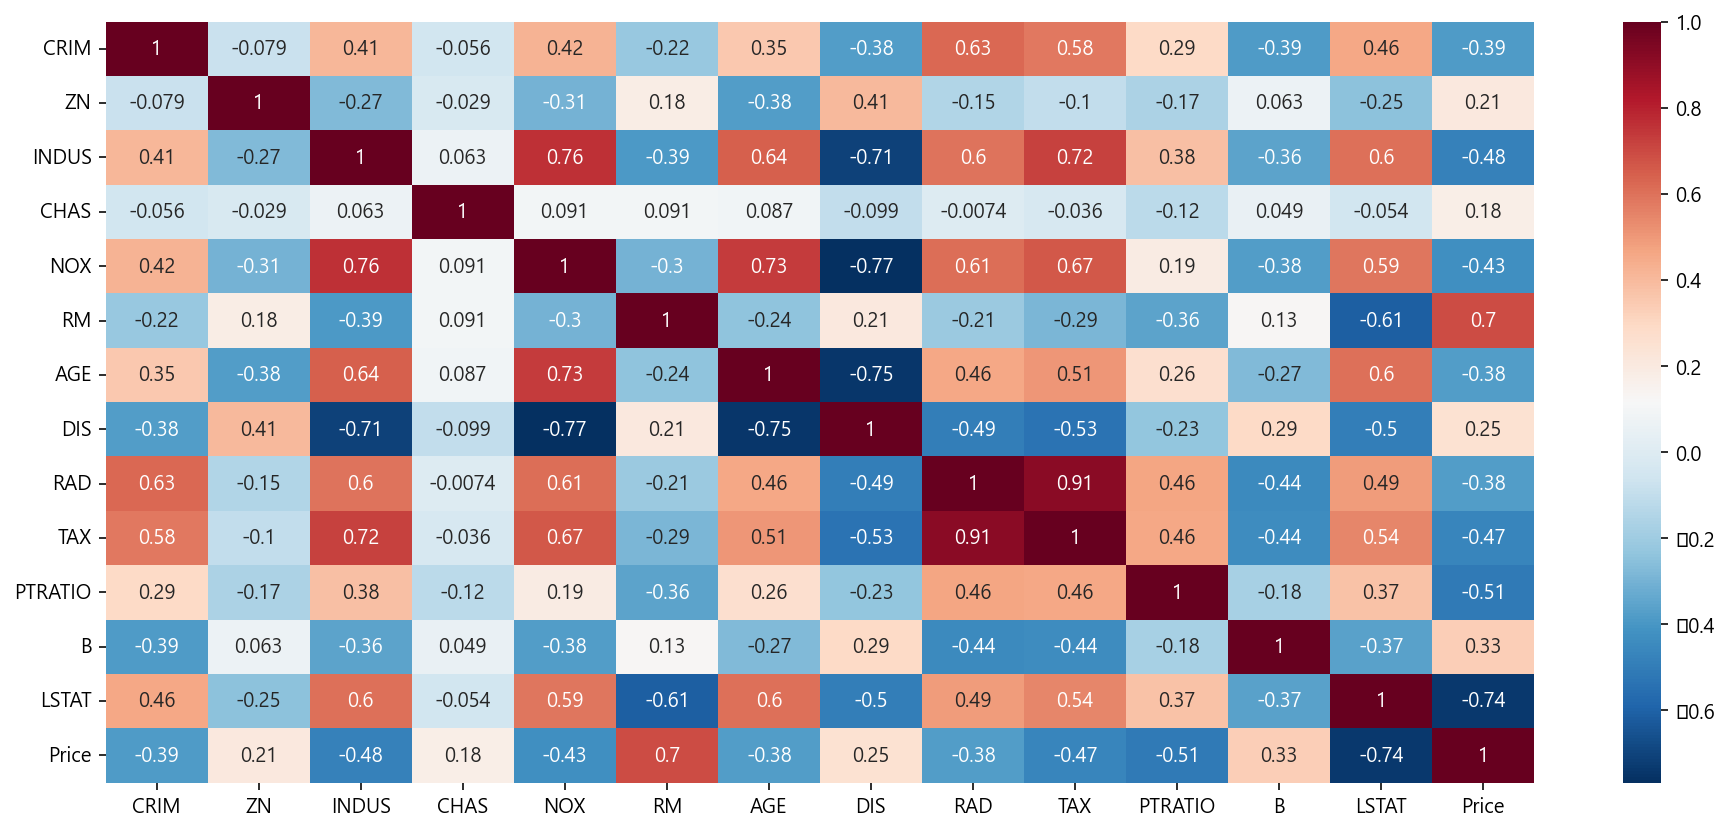

In [50]:
plt.figure(figsize=(16,7))
sns.heatmap(boston.corr(),annot=True,cmap='RdBu_r')

In [51]:
X=boston.drop(columns=['Price','CHAS'])
y=boston['Price']

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [74]:
from scipy.stats import uniform,randint

In [76]:
params1 ={
    'max_depth':randint(5,30),
    'learning_rate':uniform(0.001,0.01),
    'n_estimators':randint(5,50),
    'loss':['quantile','ls','lad']
}

In [77]:
from sklearn.model_selection import RandomizedSearchCV
gb = RandomizedSearchCV(GradientBoostingRegressor(random_state=42),params1,n_iter=70,n_jobs=-1,random_state=42)

In [61]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr,X_train,y_train,n_jobs=-1)

In [83]:
gb.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.009971102599525772, max_depth=28,
                          n_estimators=37, random_state=42)

In [84]:
gb_pred = gb.predict(X_test)
lr_pred = lr.predict(X_test)

In [85]:
print(gb.best_estimator_)

AttributeError: 'GradientBoostingRegressor' object has no attribute 'best_estimator_'

In [80]:
print(gb.best_params_)

{'learning_rate': 0.009971102599525772, 'loss': 'ls', 'max_depth': 28, 'n_estimators': 37}


In [86]:
fi=gb.feature_importances_

In [65]:
print(lr.coef_,lr.intercept_)

[-1.17720665e-01  3.18447143e-02  5.07737684e-02 -1.65118937e+01
  4.56889123e+00 -5.35311466e-03 -1.34023034e+00  2.93512607e-01
 -1.17557400e-02 -1.02216087e+00  1.31104114e-02 -5.17638262e-01] 29.838498555999678


In [82]:
gb=GradientBoostingRegressor(learning_rate=0.009971102599525772, max_depth=28,
                          n_estimators=37, random_state=42)

In [87]:
feature_importances = pd.Series(fi,X_train.columns)

In [88]:
feature_importances=feature_importances.sort_values(ascending=False)

<AxesSubplot:title={'center':'feature importance'}>

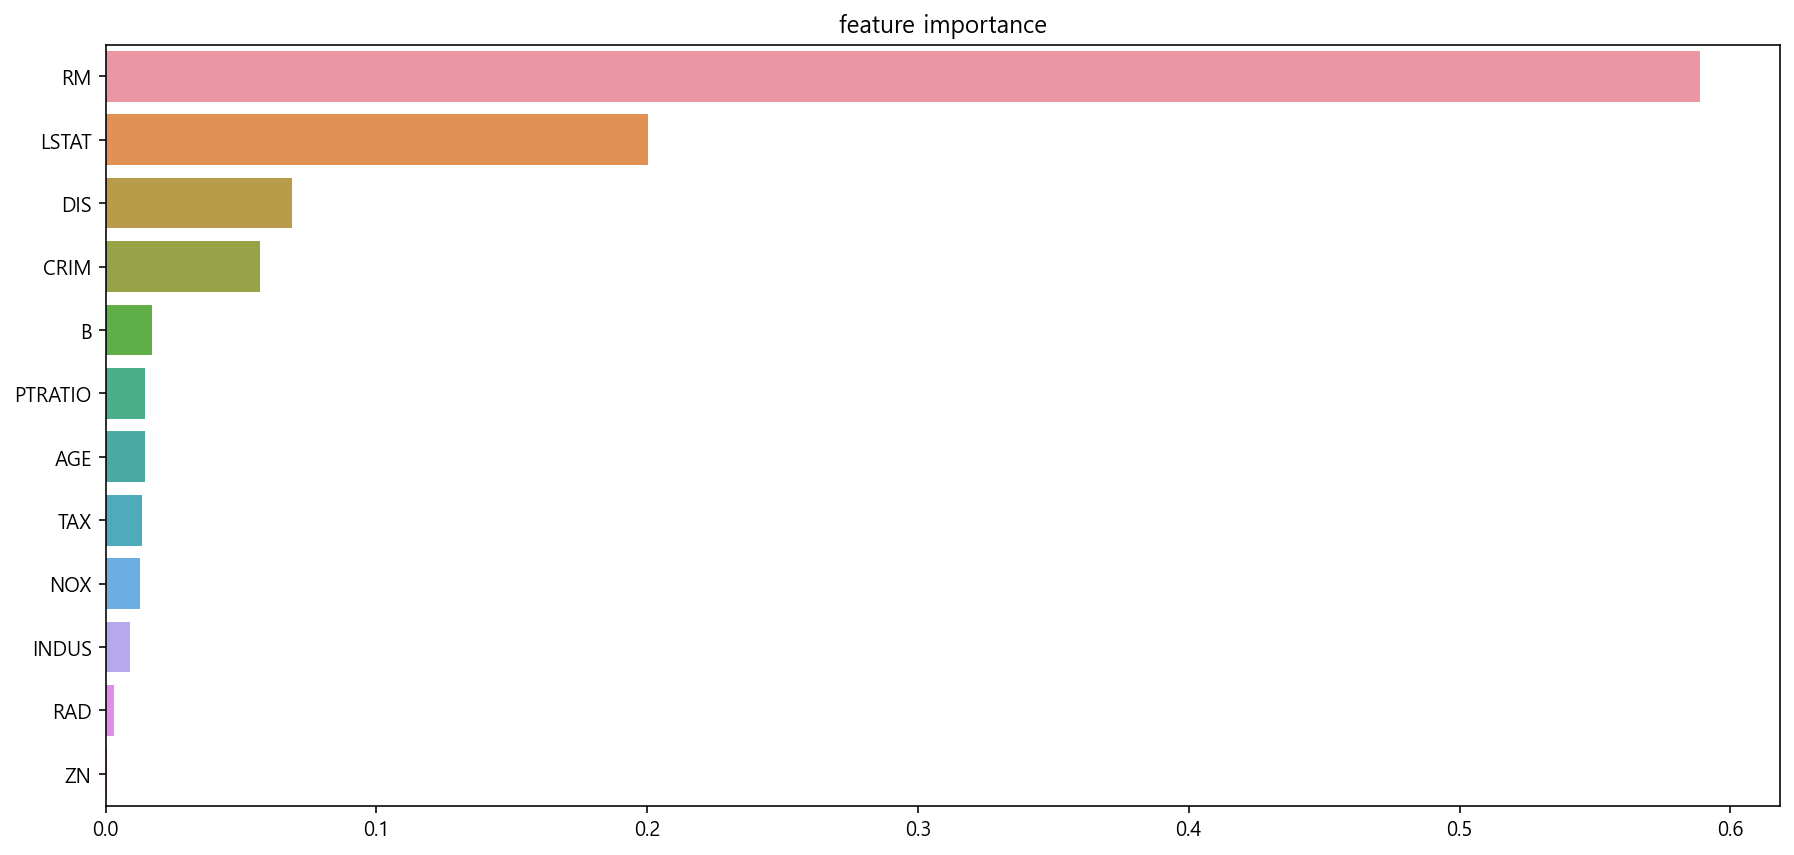

In [90]:
plt.figure(figsize=(15,7))
plt.title('feature importance')
sns.barplot(x=feature_importances,y=feature_importances.index)

### sigmoid function
![sigmoid](https://taewanmerepo.github.io/2017/09/sigmoid/post.jpg)

- sigmoid 함수는 모든 범위의 실수를 취하고 0에서 1 사이의 출력값을 반환한다
- sigmoid 함수는 'S' 형태의 포함될 커브를 생성함 --> 누적 분포 함수
- sigmoid 함수의 미분 형태
> 1.양수 및 0에 수렴: 숫자가 0보다 크거나 같은 경우  
  2.음수 및 0에 수렴: 숫자가 0보다 작거나 같은 경우  
  
__sigmoid 함수 사용__
- 로지스틱 회귀 모델에서 이진 분류로 사용
- 활성화 함수(딥러닝) 기능으로 사용
- 통계에서 누적 분포 함수로 사용

### softmax fuction
![softmax](https://lh6.googleusercontent.com/3vcfJ5hJhsMZAMFIbQOEycfVW1t6rh1CXt62DeMk8RPPXVzV4vCcURNm_z_F7618uAeSHT7qT7wE_UiK5Ic0b-Eeuunn6iTGeHWbpAaUAP6-G2ePubeGWCb4_TmSapeaimZqvuUs)

- softmax 함수는 'n'개의 다른 이벤트에 대해 이벤트의 확률 분포를 계산하는 함수
- 가능한 모든 클래스에 대해 각 대상 클래스의 확률을 계산함
- softmax 함수의 이점은 출력 확률 범위인데 범위는 0에서 1이며, 모든 확률의 합은 1과 같다.
- softmax 함수의 수식은 입력 값의 지수(e)와 입력의 모든 값의 지수 값 합계를 계산하고 그 비율을 출력한다.

__softmax 함수 사용__
- 로지스틱 회귀 모델에서 다중 분류로 사용
- 활성화 함수(딥러닝) 기능으로 사용

### 온라인 학습

- 모델을 만들고 새로운 데이터를 추가할 때 이전 데이터를 버림으로써 훈련 데이터 크기를 일정하게 유지하는 학습 방식


### 손실 함수(loss function)
- 머신러닝 or 딥러닝 모델의 출력값과 사용자가 원하는 출력값의 오차를 의미
- 샘플 하나에 대한 손실을 정의  

#### 비용 함수(cost function)
- train set에 있는 모든 샘플에 대한 손실 함수의 합

#### 최적화(optimization)
- 최적화란 특정 값이 최대나 최소가 되는 상태를 찾는 기법
- 손실함수의 결과 값을 최소화 하는 과정

## 손실함수의 종류

### MSE(Mean Squared Error)
![mse](https://media.vlpt.us/images/rcchun/post/ac220735-2d93-46e0-8812-d9772b191c85/image.png)

- 예측값과 실제값 사이의 평균 제곱 오차
- 오차가 커질수록 제곱 연산으로 인해 mse값이 더욱 뚜렷해짐
- 제곱연산이기 때문에 양수이든 음수이든 누적 값을 증가시킴

### RMSE(Root Mean Squared Error)
![rmse](https://media.vlpt.us/images/rcchun/post/1b023dc8-c9ef-4be8-bab1-de4a49ff039c/image.png)

- mse에 제곱근을 씌운 것으로 mse와 기본적으로 동일하다.
- mse 값이 오류값을 제곱해 실제 오류 평균보다 더 커지는 특성이 있어 mse에 제곱근을 씌운 rmse가 값의 왜곡을 줄여준다

## 경사 하강법(Gradient Descent)

![gradient](https://hackernoon.com/hn-images/0*rBQI7uBhBKE8KT-X.png)

- 최적화 기법 중 하나로 초기값으로부터 함수의 경사를 기울기를 이용해 계산해 경사를 따라 여러번의 step을 통해 오류값이 최소가 되는 가중치를 구하는 기법

- 경사 하강법은 최초 w에서부터 미분을 적용한 뒤 이 미분 값이 계속 감소하는 방향으로 순차적으로 w를 업데이트한다. 더 이상 미분된 1차 함수의 기울기가 감소하지 않는 지점을 비용 함수가 최소인 지점으로 간주하고 그때의 w를 반환한다.

__학습률(learning rate)__

- 경사 하강법에서 얼마만큼 하강할지 지정해야 하는데 이것을 학습률(또는 step size)라고 한다.
- 학습률이 큰 경우 한 번에 이동하는 거리가 커지므로 빠르게 수렴할 수 있다는 장점이 있지만 너무 크게 설정하면 최솟값을 계산하도록 수렴하지 못하고 함숫값이 계속 커지는 방향으로 최적화가 진행될 수도 있다는 단점이 있다.
- 학습률이 작은 경우 함숫값이 발산하지는 않을 수 있지만 학습시간이 너무 오래 걸린다는 단점이 있다.

## 배치 경사 하강법 (Batch Gradient Descent: BGD)
- 배치 경사 하강법이랑, 전체 학습 데이터를 하나의 배치(크기:n)로 묶어서 학습 시키는 경사 하강 법을 말한다.
- 전체 데이터에 대한 모델의 오차 평균을 구한 다음, 이를 미분을 통해 경사를 산출, 최적화를 진행한다
- 전체 데이터를 통해 학습하기 때문에 업데이트 횟수가 가장 적다.
- 항상 같은 데이터(전체 데이터)에 대해 경사를 구하기 때문에, 수렴이 안정적이라는 장점이 있지만 전체 데이터를 처리하기 때문에 많은 메모리가 필요한 단점이 있다.

## 확률적 경사 하강법(SGDClassifier)

- 모든 데이터에 대해 가중치를 조절하는 것이 아닌 랜덤으로 일부를 추출해서 그에 대해 가중치를 조절 하는 방법
- 배치 데이터에 비해 적은 데이터로 학습할 수 있고, 속도가 빠른 장점이 있지만 noise가 잦아 최저점을 찾기 어려운 단점이 있다  

## 미니 배치 확률적 경사 하강법 (Mini-Batch Stochastic Gradient Descent: MSGD)
- SGD와 BGD의 중간으로, 전체 데이터를(batch_size)로 나눠 배치로 학습(배치 크기를 사용자가 지정)시키는 것이다
- data=2000, batch_size=100이면, 전체를 100개씩 총 20 묶음의 배치로 나눠 1 epoch당 20번 경사하강법을 진행한다

#### batch_size

- 보통 2의 n승으로 하는 것이 좋음(GPU 연산 용이)
- 가능하면 전체 데이터수에 나눠 떨어지게 설정하고 , 아니면 마지막 배치를 버리는게 좋음

## 확률적 경사 하강법 사용해서 머신러닝

In [144]:
fish = pd.read_csv('https://bit.ly/fish_csv')

In [156]:
fish_input = fish.iloc[:,1:].to_numpy()
fish_target = fish['Species'].to_numpy()

In [157]:
x_train,x_test,y_train,y_test=train_test_split(fish_input,fish_target,random_state=42)

In [158]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
ss.fit(x_train)
x_train_scaled=ss.transform(x_train)
x_test_scaled=ss.transform(x_test)

In [159]:
from sklearn.linear_model import SGDClassifier

In [161]:
sgdc = SGDClassifier(loss='log',max_iter=10,random_state=42)
sgdc.fit(x_train_scaled,y_train)
print(sgdc.score(x_train_scaled,y_train))
print(sgdc.score(x_test_scaled,y_test))

0.773109243697479
0.775


In [162]:
# partial_fit --> 이전 모델을 재사용해서 학습
sgdc.partial_fit(x_train_scaled,y_train)
print(sgdc.score(x_train_scaled,y_train))
print(sgdc.score(x_test_scaled,y_test))

0.8151260504201681
0.85


#### 조기 종료(early stopping)
- overfitting 되기전에 훈련을 멈추는 것

**early stopping 그래프 만들기**

In [172]:
sgdc = SGDClassifier(loss='log',random_state=42)
train_score=[]
test_score=[]
classes = np.unique(y_train)

In [175]:
#epoch를 300으로 그래프 만들기

for _ in range(0,300):
    sgdc.partial_fit(x_train_scaled,y_train,classes=classes)
    train_score.append(sgdc.score(x_train_scaled,y_train))
    test_score.append(sgdc.score(x_test_scaled,y_test))

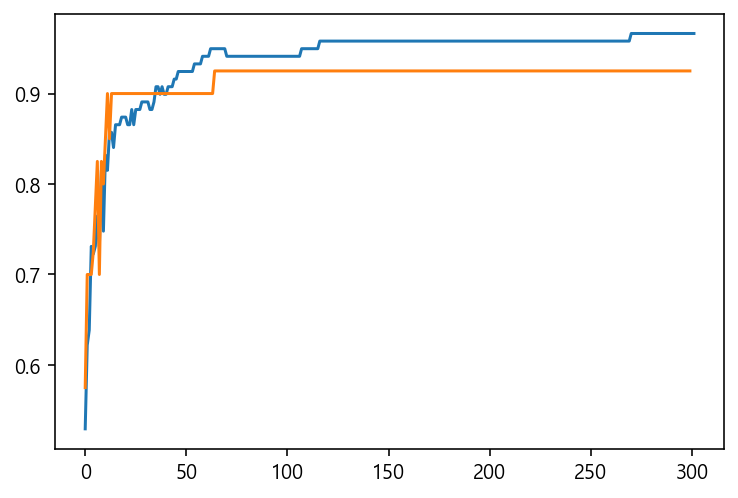

In [176]:
plt.plot(train_score)
plt.plot(test_score)
plt.show()

__epoch 100 부근에서 과적합(overfitting) 발생__

In [182]:
# 학습횟수 100으로 ml --> 정확도 향상
sgdc = SGDClassifier(loss='log',max_iter=100,tol=None,random_state=42)
sgdc.fit(x_train_scaled,y_train)
print(sgdc.score(x_train_scaled,y_train))
print(sgdc.score(x_test_scaled,y_test))

0.957983193277311
0.925


In [183]:
## svm loss function->hinge
sgdc= SGDClassifier(loss='hinge',max_iter=100,tol=None,random_state=42)
sgdc.fit(x_train_scaled,y_train)
sgdc.score(x_train_scaled,y_train)

0.9495798319327731

In [184]:
sgdc.score(x_test_scaled,y_test)

0.925

## 의사결정 나무(Decision Tree)

- 분류와 회귀 둘 다 가능한 지도 학습 모델 중 하나로 스무고개 하듯이 예/아니오 질문을 이어가며 학습한다.
- '균일도'라는 룰을 기반으로 한 알고리즘으로 쉽고 직관적이며 시각화하기 용이한 장점이 있지만 과적합이 발생할 확률이 높은 단점이 있는 알고리즘이다. 

__불순도(impurity)__


- 불순도란 해당 범주안에 서로 다른 데이터가 얼마나 섞여있는지 뜻한다.
- 한 범주에 데이터가 하나만 있다면 불순도가 최소(아니면 최대)이고, 서로 다른 두 데이터가 반반 있으면 불순도 최대(순도가 최소)이다.

__정보량__
I
(
x
)
=
l
o
g
2
1
p
(
x
)

- 어떤 사건이 가지고 있는 정보의 양을 의미, 
- p(X): 사건 x가 발생할 확률
- 사건 x가 발생할 확률이 증가할 수록, 정보량은 0에 수렴 --> 흔하게 발생하는 사건일수록 정보량이 적다.

__엔트로피(entropy)__
![entropy](https://blog.kakaocdn.net/dn/elDB1S/btqYurzUZsM/Nkz1v7SbDy6Wqk8p1mudBK/img.png)

- 불순도를 수치화(정량화)한 값, 정보량의 기댓값
- s: 이미 발생한 사건 , c: 전체 사건의 갯수

__정보 이득(information gain)__

- 분할 전 엔트로피(부모노드)와 분할 후 엔트로피(자식노드)의 차이

__ID3 알고리즘__
![id3](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FdC3AXs%2FbtrgJZditwU%2F592jJhkWCSp6ai6OzmLqek%2Fimg.png)

- 불순도를 엔트로피를 이용한 정보이득으로 계산하는 알고리즘 
- 범주형 변수에서만 사용가능한 단점이 있다.
- 범주형에서만 사용가능한 단점을 해결한 C4.5 알고리즘도 있다
__지니 계수(gini index)__
![gini](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FXee5L%2FbtqXu5b5qDa%2FNKIjn1JngCmcK5kX6R8zH1%2Fimg.png)
- 불순도를 측정하는 지표로써, 데이터의 통계적 분산정도를 정량화해서 표현한 값
- 지니계수는 데이터가 얼마나 불확실한가?(얼마나 섞여있는가?)를 나타낸다

__CART 알고리즘__
![cart](https://tyami.github.io/assets/images/post/ML/2020-10-05-CART/2020-10-05-cart-binary-tree.png)
- 불순도를 지니계수로 계산하는 알고리즘
- 범주형 변수에서만 사용가능한 불순도를 측정할때 종속변수가 범주형인 경우 지니 계수를 사용하고 연속형인 경우 분산을 사용해 이진 분리(binary split)한다.

__포화 트리(full tree)__

-  모든 terminal node의 순도가 100%(불순도가 0)인 상태

__가지치기(pruning)__

- 가지치기란 decision tree의 과적합을 방지하기 위해 적절한 수준에서 terminal node를 결합해주는 것을 뜻한다.

__사전 가지치기__

- 사전 가지치기는 트리의 최대 depth, 각 노드에 있어야 할 최소 관측값 수 등을 미리 지정하여 트리를 만드는 도중에 stop하는 것을 뜻한다.

__사후 가지치기__

- 트리를 먼저 full tree로 만든 후 적절한 수준에서 terminal node를 결합하는 것


In [185]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine-date')

In [186]:
wine.info()
print(wine.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB
(6497, 4)


In [211]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [187]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [193]:
wine.isnull().sum()

alcohol    0
sugar      0
pH         0
class      0
dtype: int64

In [205]:
data=wine.iloc[:,:3]
data.head()

,alcohol,sugar,pH
0,9.4,1.9,3.51
1,9.8,2.6,3.20
2,9.8,2.3,3.26
3,9.8,1.9,3.16
4,9.4,1.9,3.51


In [206]:
data=wine.iloc[:,:3].to_numpy()
target=wine.iloc[:,3].to_numpy()

In [207]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,target,
                                               test_size=0.2,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


(5197, 3) (5197,)
(1300, 3) (1300,)


In [208]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test=ss.transform(X_test)

In [209]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.7808350971714451
0.7776923076923077


In [210]:
print(lr.coef_,lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


__로지스틱 회귀로 설명하기 어렵다__

In [213]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

0.996921300750433
0.8592307692307692


__decision tree 학습결과 overfitting 되어있음__

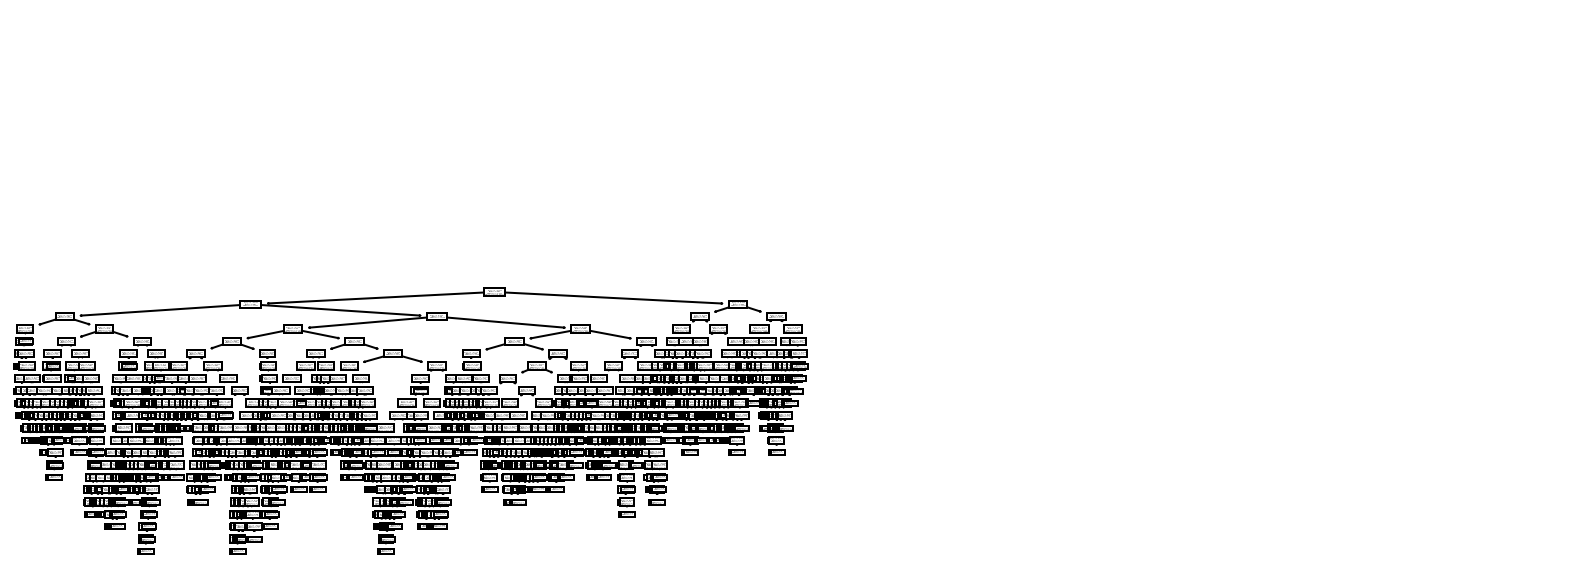

In [215]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,5))
plot_tree(dt)
plt.show()

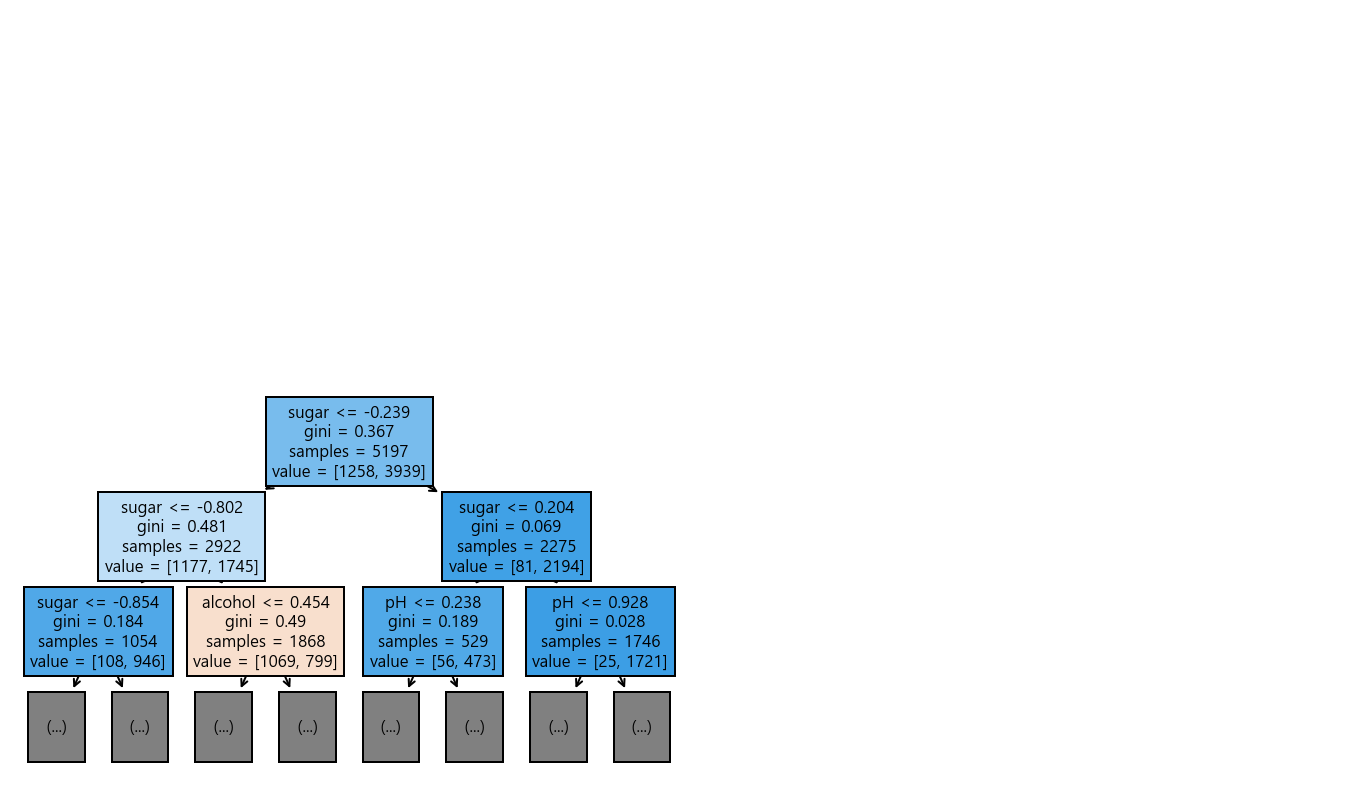

In [216]:
plt.figure(figsize=(12,7))
plot_tree(dt,max_depth=2,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

In [246]:
## 가지치기
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(X_train,y_train)
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

0.8454877814123533
0.8415384615384616


In [247]:
feature_names=['alcohol','sugar','pH']
class_names=['red','white']
dt_dot_data = tree.export_graphviz(dt,out_file=None
                                  ,feature_names=feature_names,
                                  class_names=class_names,
                                  filled=True,rounded=True,
                                  special_characters=True)

In [248]:
pydotplus.graph_from_dot_data(dt_dot_data)

In [249]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

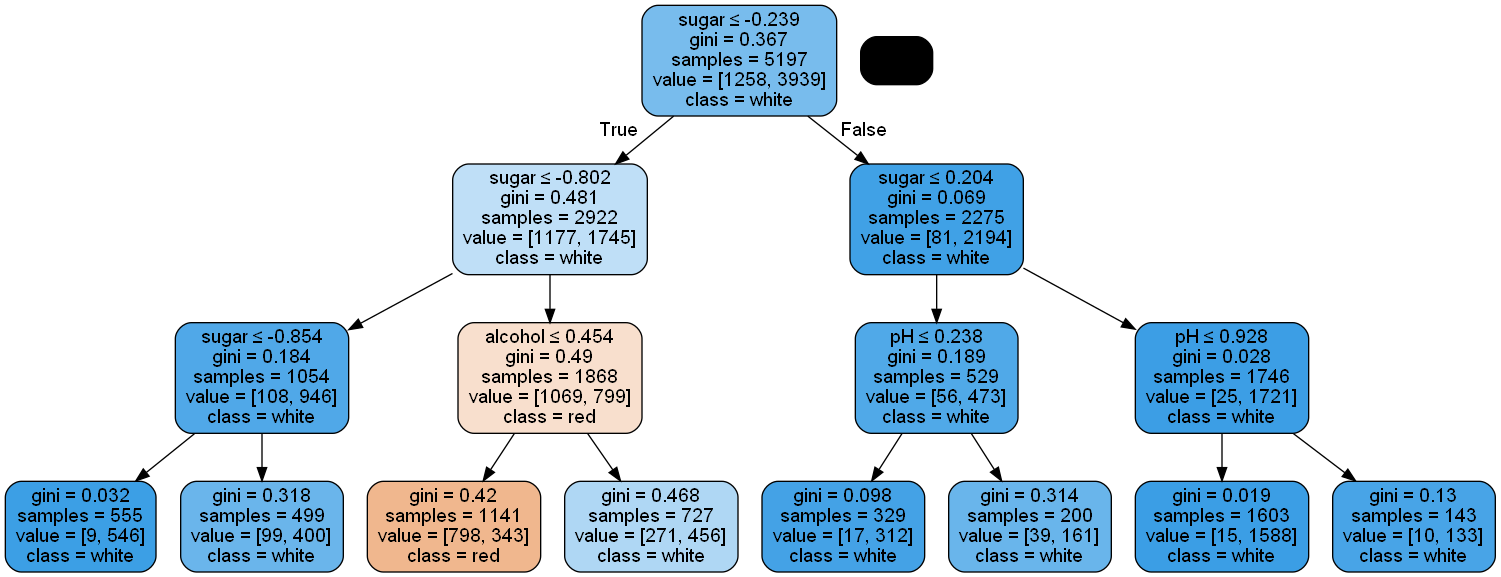

In [250]:
Image(dt_graph.create_png())

In [251]:
#특성 중요도 계산 --> sugar가 가장 높다
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


In [252]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(X_train, y_train)

print(dt.score(X_train, y_train))
print(dt.score(X_test,y_test))

0.8874350586877044
0.8615384615384616


In [253]:
from sklearn import tree
feature_names=['alcohol','sugar','pH']
class_names=['red','white']
dt_dot_data = tree.export_graphviz(dt,out_file=None
                                  ,feature_names=feature_names,
                                  class_names=class_names,
                                  filled=True,rounded=True,
                                  special_characters=True)

In [254]:
pydotplus.graph_from_dot_data(dt_dot_data)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

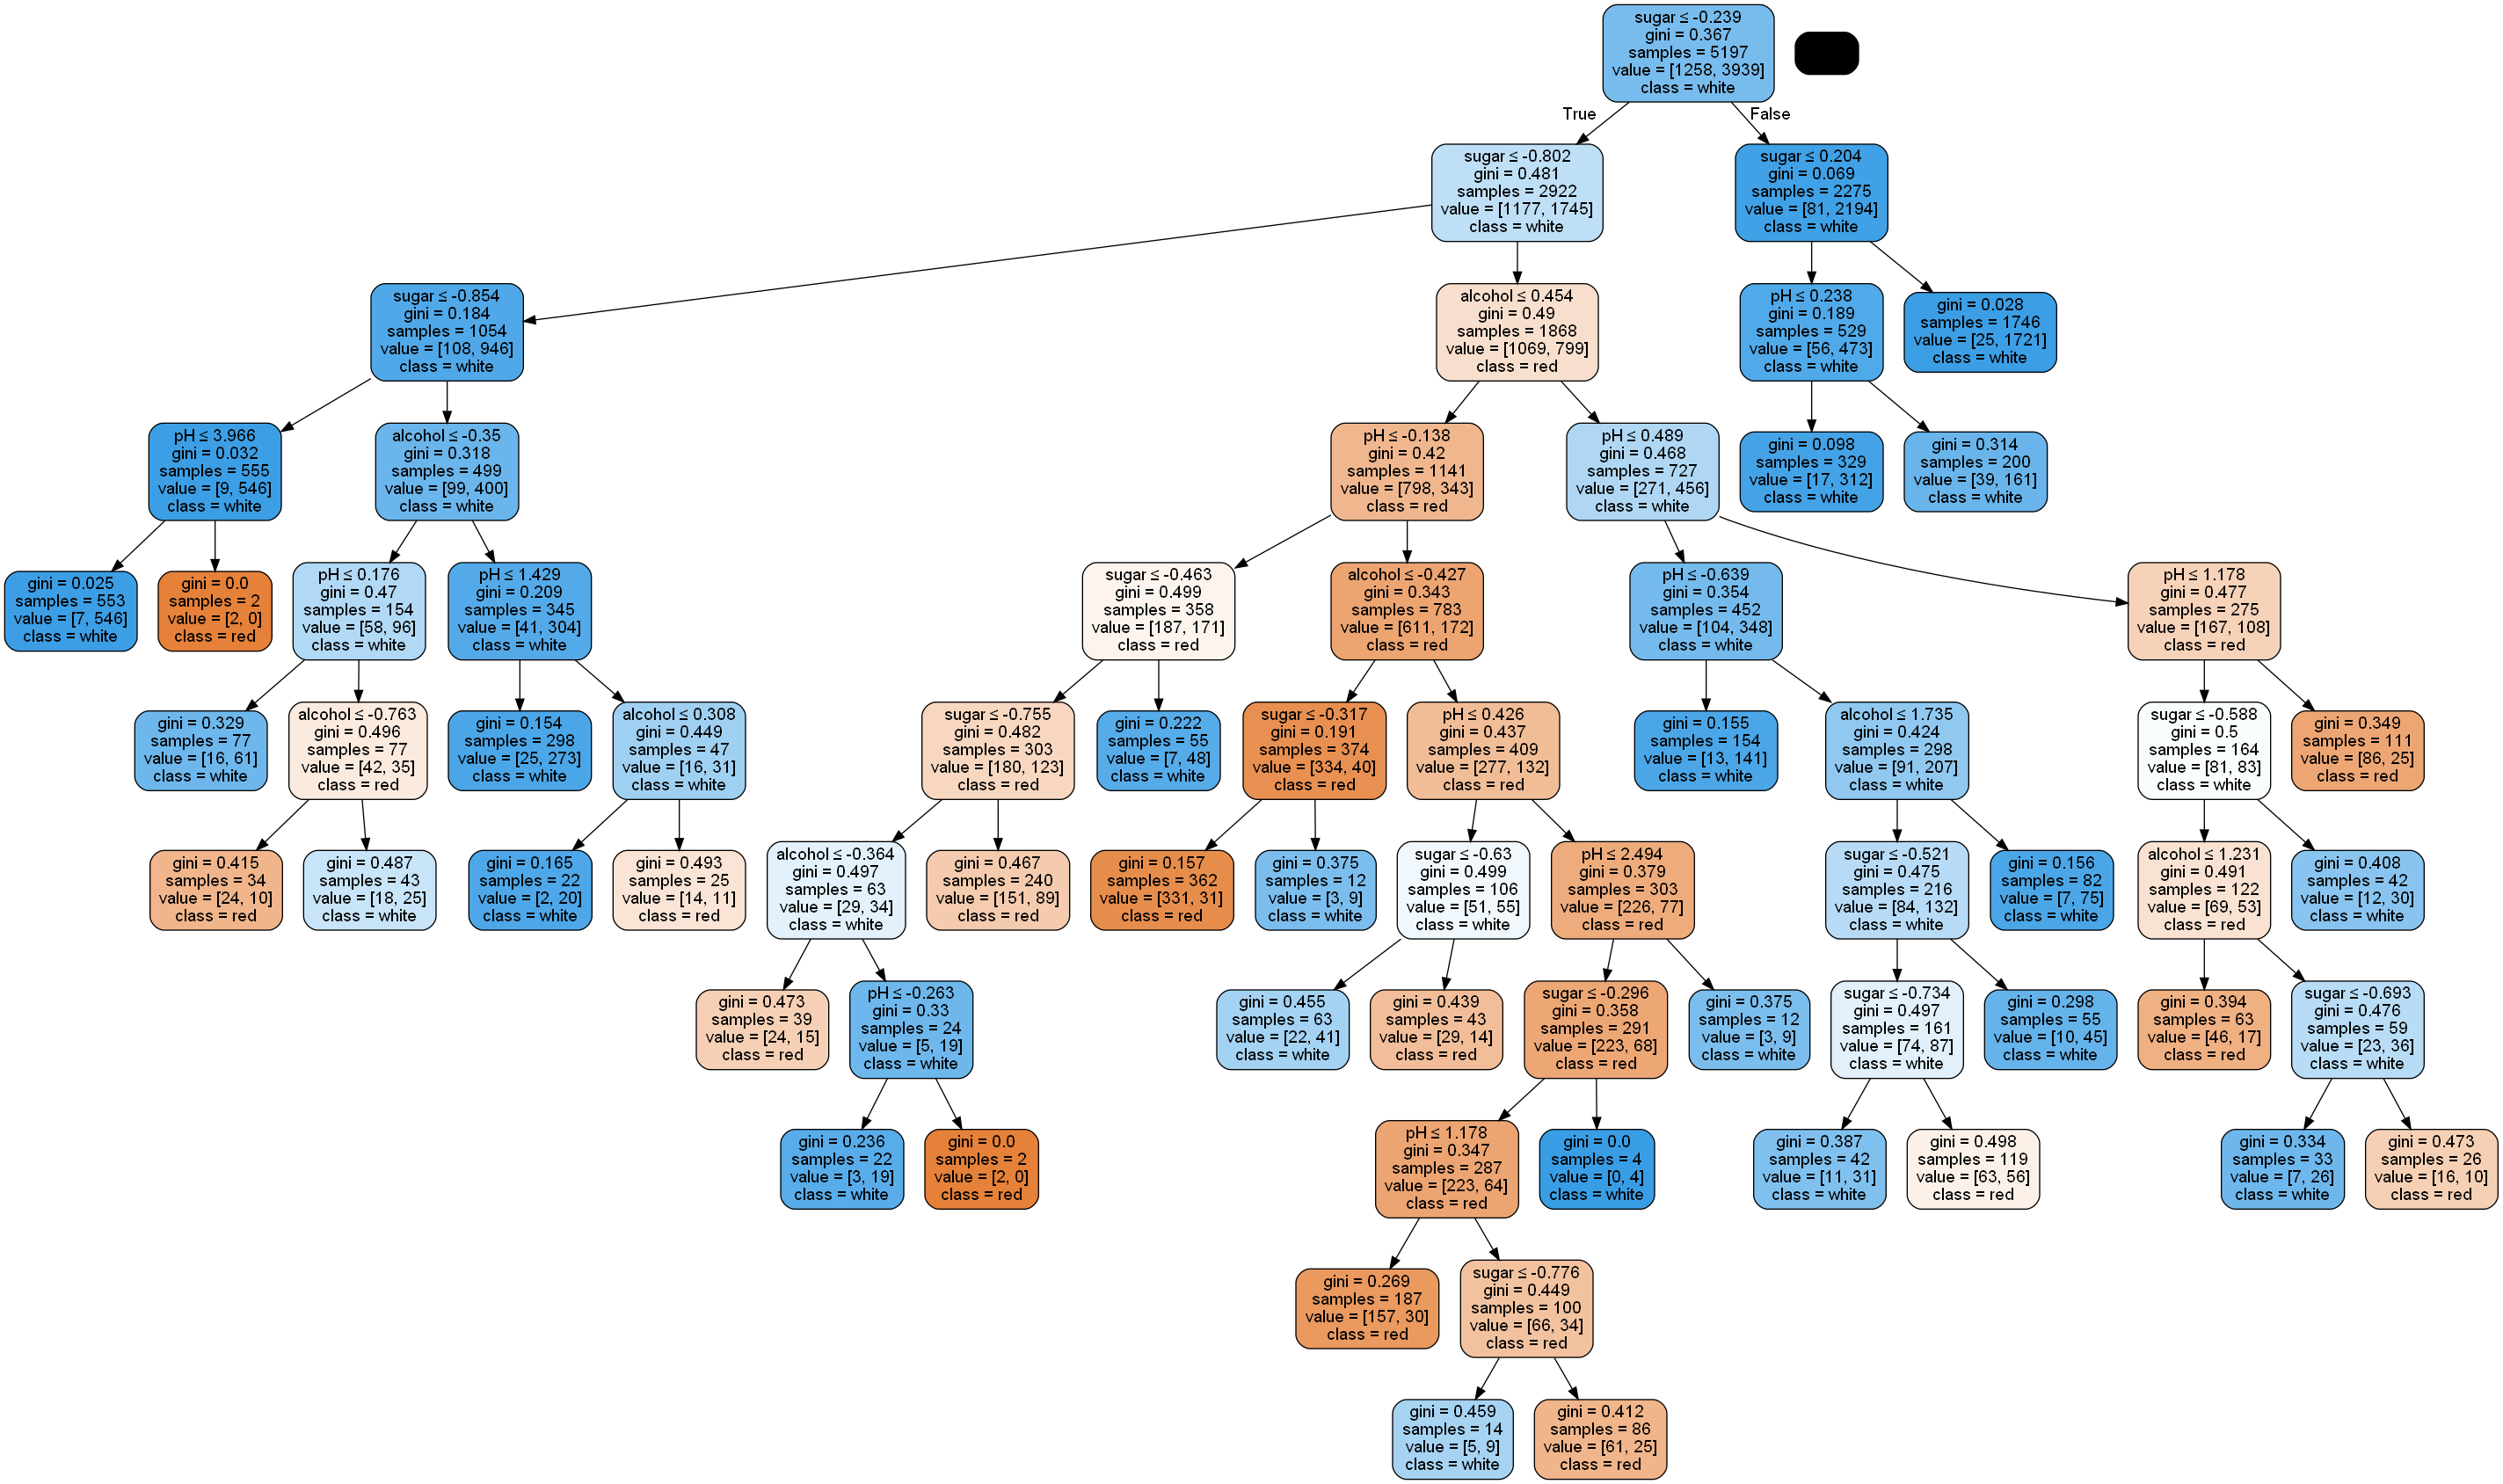

In [255]:
Image(dt_graph.create_png())

## 교차 검증(cross validation)

- 고정된 train set과 test set으로만 모델을 검증하는 것이 아닌 데이터의 모든 부분을 사용해 검증하는 방식


## 교차 검증의 종류
__K-겹 교차 검증(K-fold cross validation)__
- 전체 데이터 셋을 K등분의 부분집합으로 분할하고, K-1개의 부분집합은 학습 데이터셋으로, 나머지 1개의 부분집합은 테스트 데이터셋을 할당한다. 교차 검증을 총 K번만큼 반복한다.

__계층적 k-겹 교차검증(StratifiedKFold cross validation)__

- 일반적인 Kfold의 경우 분류할 클래스의 비율이 다를 경우 이를 반영해서 k개를 fold해야 한다.하지만 Stratify KFold는 k개의 fold를 분할한 이후에도 전체 훈련 데이터의 class 비율과 각 fold가 가지고 있는 클래스의 비율을 맞춰준다.

__Holdout 교차 검증__
- 전체 데이터셋을 학습 데이터셋과 테스트 데이터셋으로 나누고, 분리된 학습 데이터셋에서 다시 검증 데이터셋을 따로 떼어내어 교차 검증하는 방법이다. 교차 검증을 한 번만 진행하기에 계산 시간이 적은 것이 장점이다.

__Leave-one-out 교차 검증__
- 전체 N개의 샘플 데이터셋을 N-1개의 학습 데이터셋과 1개의 테스트 데이터셋으로 나누어, 총 N번만큼 교차 검증을 반복한다. 계산량이 많다는 단점이 존재한다.

__Leave-p-out 교차 검증__
- 전체 N개의 샘플 데이터셋을 N-p개의 학습 데이터셋과 p개의 테스트 데이터셋으로 나누어, 총 nCp번만큼 교차 검증을 반복한다. Leave-one-out 교차 검증 기법보다 더 계산량이 많기 때문에 교차 검증 반복 횟수를 늘리고자 할 때 사용한다.



#### K-fold 교차검증 함수

__파라미터__

- n_splits : Fold의 개수 k 값 (정수형, 기본 : 5)

- shuffle : 데이터를 쪼갤 때 섞을지 유무 (True/False, 기본 : False)

- random_state : 난수 설정

In [256]:
wine = pd.read_csv('https://bit.ly/wine-date')

In [259]:
data = wine.iloc[:,:3].to_numpy()
target=wine.iloc[:,3].to_numpy()

In [260]:
## 데이터 셋 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [261]:
X_sub,X_valid,y_sub,y_valid=train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [262]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_sub,y_sub)
print(dt.score(X_sub,y_sub))
print(dt.score(X_valid,y_valid))

0.9971133028626413
0.864423076923077


In [263]:
## 교차 검증 
from sklearn.model_selection import cross_validate

In [264]:
scores =cross_validate(dt,X_train,y_train)
print(scores)

{'fit_time': array([0.01552892, 0.01622343, 0.01295662, 0.00669122, 0.00598121]), 'score_time': array([0.        , 0.00099373, 0.        , 0.        , 0.        ]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [266]:
#검증 fold의 score
print(np.mean(scores['test_score']))

0.855300214703487


In [267]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt,X_train,y_train,cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [269]:
splitter = StratifiedKFold(n_splits=15,shuffle=True,random_state=42)
scores = cross_validate(dt,X_train,y_train,cv=splitter)
print(np.mean(scores['test_score']))

0.8626087632500986
